<a href="https://colab.research.google.com/github/thwlswkdgh/GAN/blob/main/code_practice/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Git clone

In [ ]:
!git clone https://github.com/davidADSP/GDL_code

Cloning into 'GDL_code'...
remote: Enumerating objects: 391, done.
remote: Total 391 (delta 0), reused 0 (delta 0), pack-reused 391
Receiving objects: 100% (391/391), 22.13 MiB | 23.39 MiB/s, done.
Resolving deltas: 100% (237/237), done.


### ipynb 합치기

In [ ]:
#!pip install nbmerge
##nbmerge file_1.ipynb file_2.ipynb file_3.ipynb > merged.ipynb

  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6413 sha256=f6bc00dd94b6ab5f06894ed8740d0459a544b611c4ce0e5a45a4a17ec2b9474e
  Stored in directory: /root/.cache/pip/wheels/ce/2d/ef/1833d9299f557279f700d29a3355ad2b5fa9e35c32f84c5b3a
Successfully built nbmerge


### Gdrive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 경로 이동

In [ ]:
%cd /content/drive/MyDrive/GAN/GAN2_Src

/content/drive/MyDrive/GAN/GAN2_Src


In [ ]:
!pwd

/content/drive/MyDrive/GAN/GAN2_Src


In [ ]:
!ls

03_01_autoencoder.ipynb  celeba-dataset      GDL_code	  requirements.txt
03_02_vae_digit.ipynb	 celeba-dataset.zip  kaggle.json  run
03_03_vae_face.ipynb	 Common.ipynb	     models	  utils


### 환경 설정(PIP install requirements)

In [ ]:
# !pip install -r requirements.txt

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-sjvru7a1
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-sjvru7a1
     |████████████████████████████████| 96 kB 3.4 MB/s 
     |████████████████████████████████| 157 kB 72.7 MB/s 
     |████████████████████████████████| 701 kB 67.8 MB/s 
     |████████████████████████████████| 10.6 MB 59.4 MB/s 
     |████████████████████████████████| 2.8 MB 52.3 MB/s 
     |████████████████████████████████| 113 kB 55.5 MB/s 
     |████████████████████████████████| 768 kB 72.5 MB/s 
     |████████████████████████████████| 111 kB 68.6 MB/s 
     |████████████████████████████████| 177 kB 59.3 MB/s 
     |████████████████████████████████| 126 kB 50.4 MB/s 
     |████████████████████████████████| 89 kB 6.9 MB/s 
     |████████████████████████████████| 126 kB 66.8 MB/s 
     |████████████████████████████████| 312 kB 68.6 MB/s 
     |████████████████████████████████| 51 kB

# VAE Training

## imports

In [ ]:
import os

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist

In [ ]:
# run params
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [ ]:
(x_train, y_train), (x_test, y_test) = load_mnist()

## architecture

In [ ]:
vae = VariationalAutoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [ ]:
vae.encoder.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 encoder_conv_0 (Conv2D)        (None, 28, 28, 32)   320         ['encoder_input[0][0]']          
                                                                                                  
 leaky_re_lu_7 (LeakyReLU)      (None, 28, 28, 32)   0           ['encoder_conv_0[0][0]']         
                                                                                                  
 encoder_conv_1 (Conv2D)        (None, 14, 14, 64)   18496       ['leaky_re_lu_7[0][0]']          
                                                                                            

In [ ]:
vae.decoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 decoder_conv_t_0 (Conv2DTra  (None, 7, 7, 64)         36928     
 nspose)                                                         
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 7, 7, 64)          0         
                                                                 
 decoder_conv_t_1 (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                   

## training

In [ ]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000

In [ ]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
BATCH_SIZE = 32
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 1

In [ ]:
vae.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
    )

Epoch 2/200


TypeError: ignored

In [ ]:
__num

# VAE Analysis

## imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist, load_model

In [ ]:
# run params
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

## data

In [ ]:
(x_train, y_train), (x_test, y_test) = load_mnist()

## architecture

In [ ]:
vae = load_model(VariationalAutoencoder, RUN_FOLDER)

## reconstructing original paintings

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: list index out of range
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: list index out of range
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: list index out of range
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

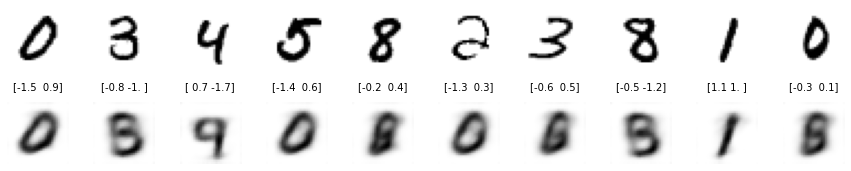

In [ ]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')


## Mr N. Coder's wall

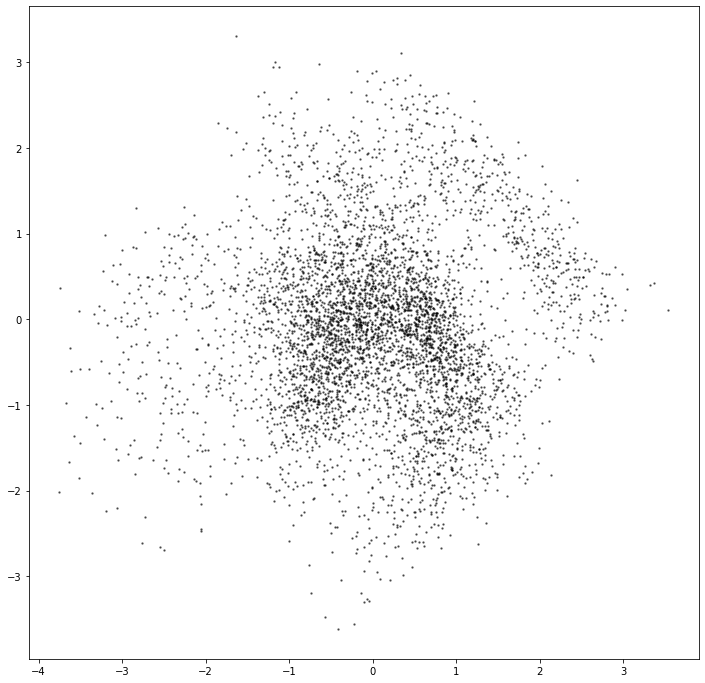

In [ ]:
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

### The new generated art exhibition

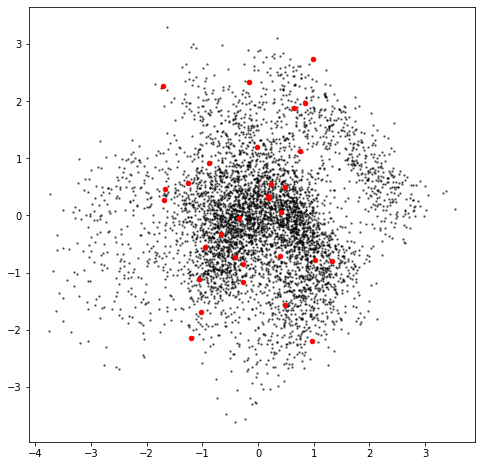

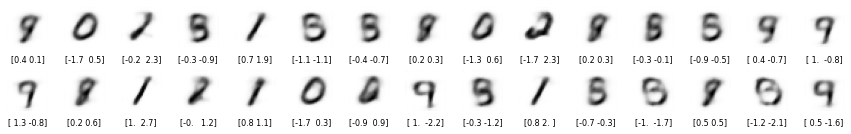

In [ ]:
figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)


grid_size = 15
grid_depth = 2
figsize = 15

x = np.random.normal(size = grid_size * grid_depth)
y = np.random.normal(size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y)))
reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=8, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

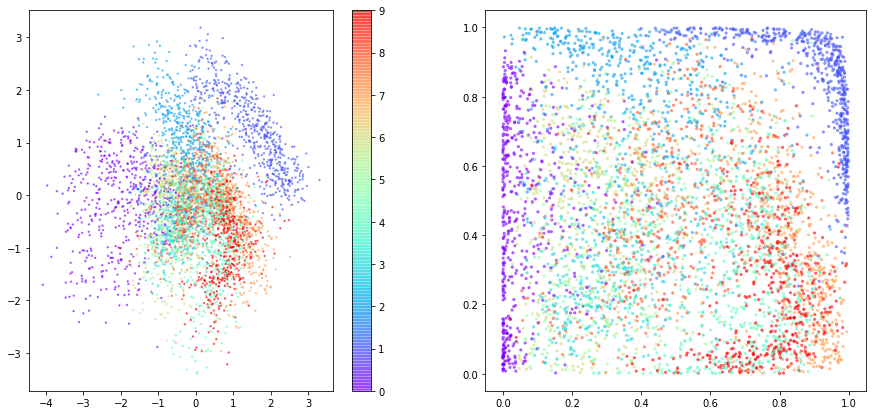

In [ ]:
n_to_show = 5000
grid_size = 15
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(1, 2, 1)
plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar(plot_1)

ax = fig.add_subplot(1, 2, 2)
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=5)



plt.show()

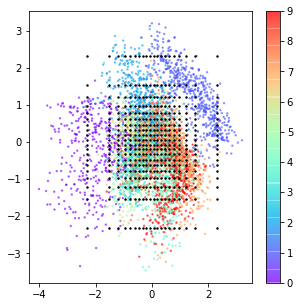

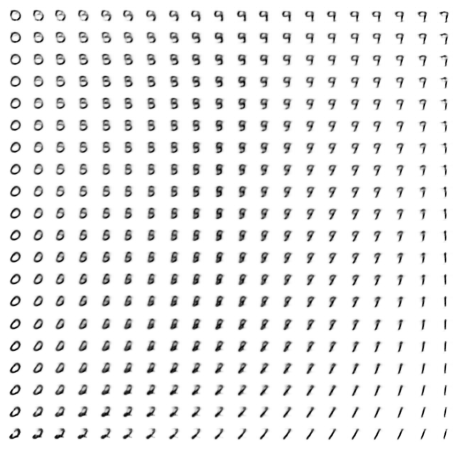

In [ ]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=2)




plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')